In [333]:
import networkx as nx
import numpy as np
import pandas as pd
import community
from operator import itemgetter
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv('C:/Users/zw903e/Desktop/Emirates/Bristol Adjacency_1.csv')
df.head()

ID-1  ID-2
0     1   422
1     2   826
2     2  1047
3     3   209
4     3   612

In [335]:
df.shape

(9076, 2)

In [336]:
df.dtypes

ID-1    int64
ID-2    int64
dtype: object

In [337]:
# Instantiate the graph
G = nx.Graph()

In [338]:
data = nx.from_pandas_edgelist(df, source='ID-1', target='ID-2', edge_attr=True)

In [339]:
print(nx.info(data))

Name: 
Type: Graph
Number of nodes: 2892
Number of edges: 4538
Average degree:   3.1383


In [340]:
#data.nodes()

In [341]:
#print(len(data.nodes()))

In [342]:
#data.edges()

In [343]:
#nodes = len(data.nodes())

In [344]:
spring_pos = nx.spring_layout(data)

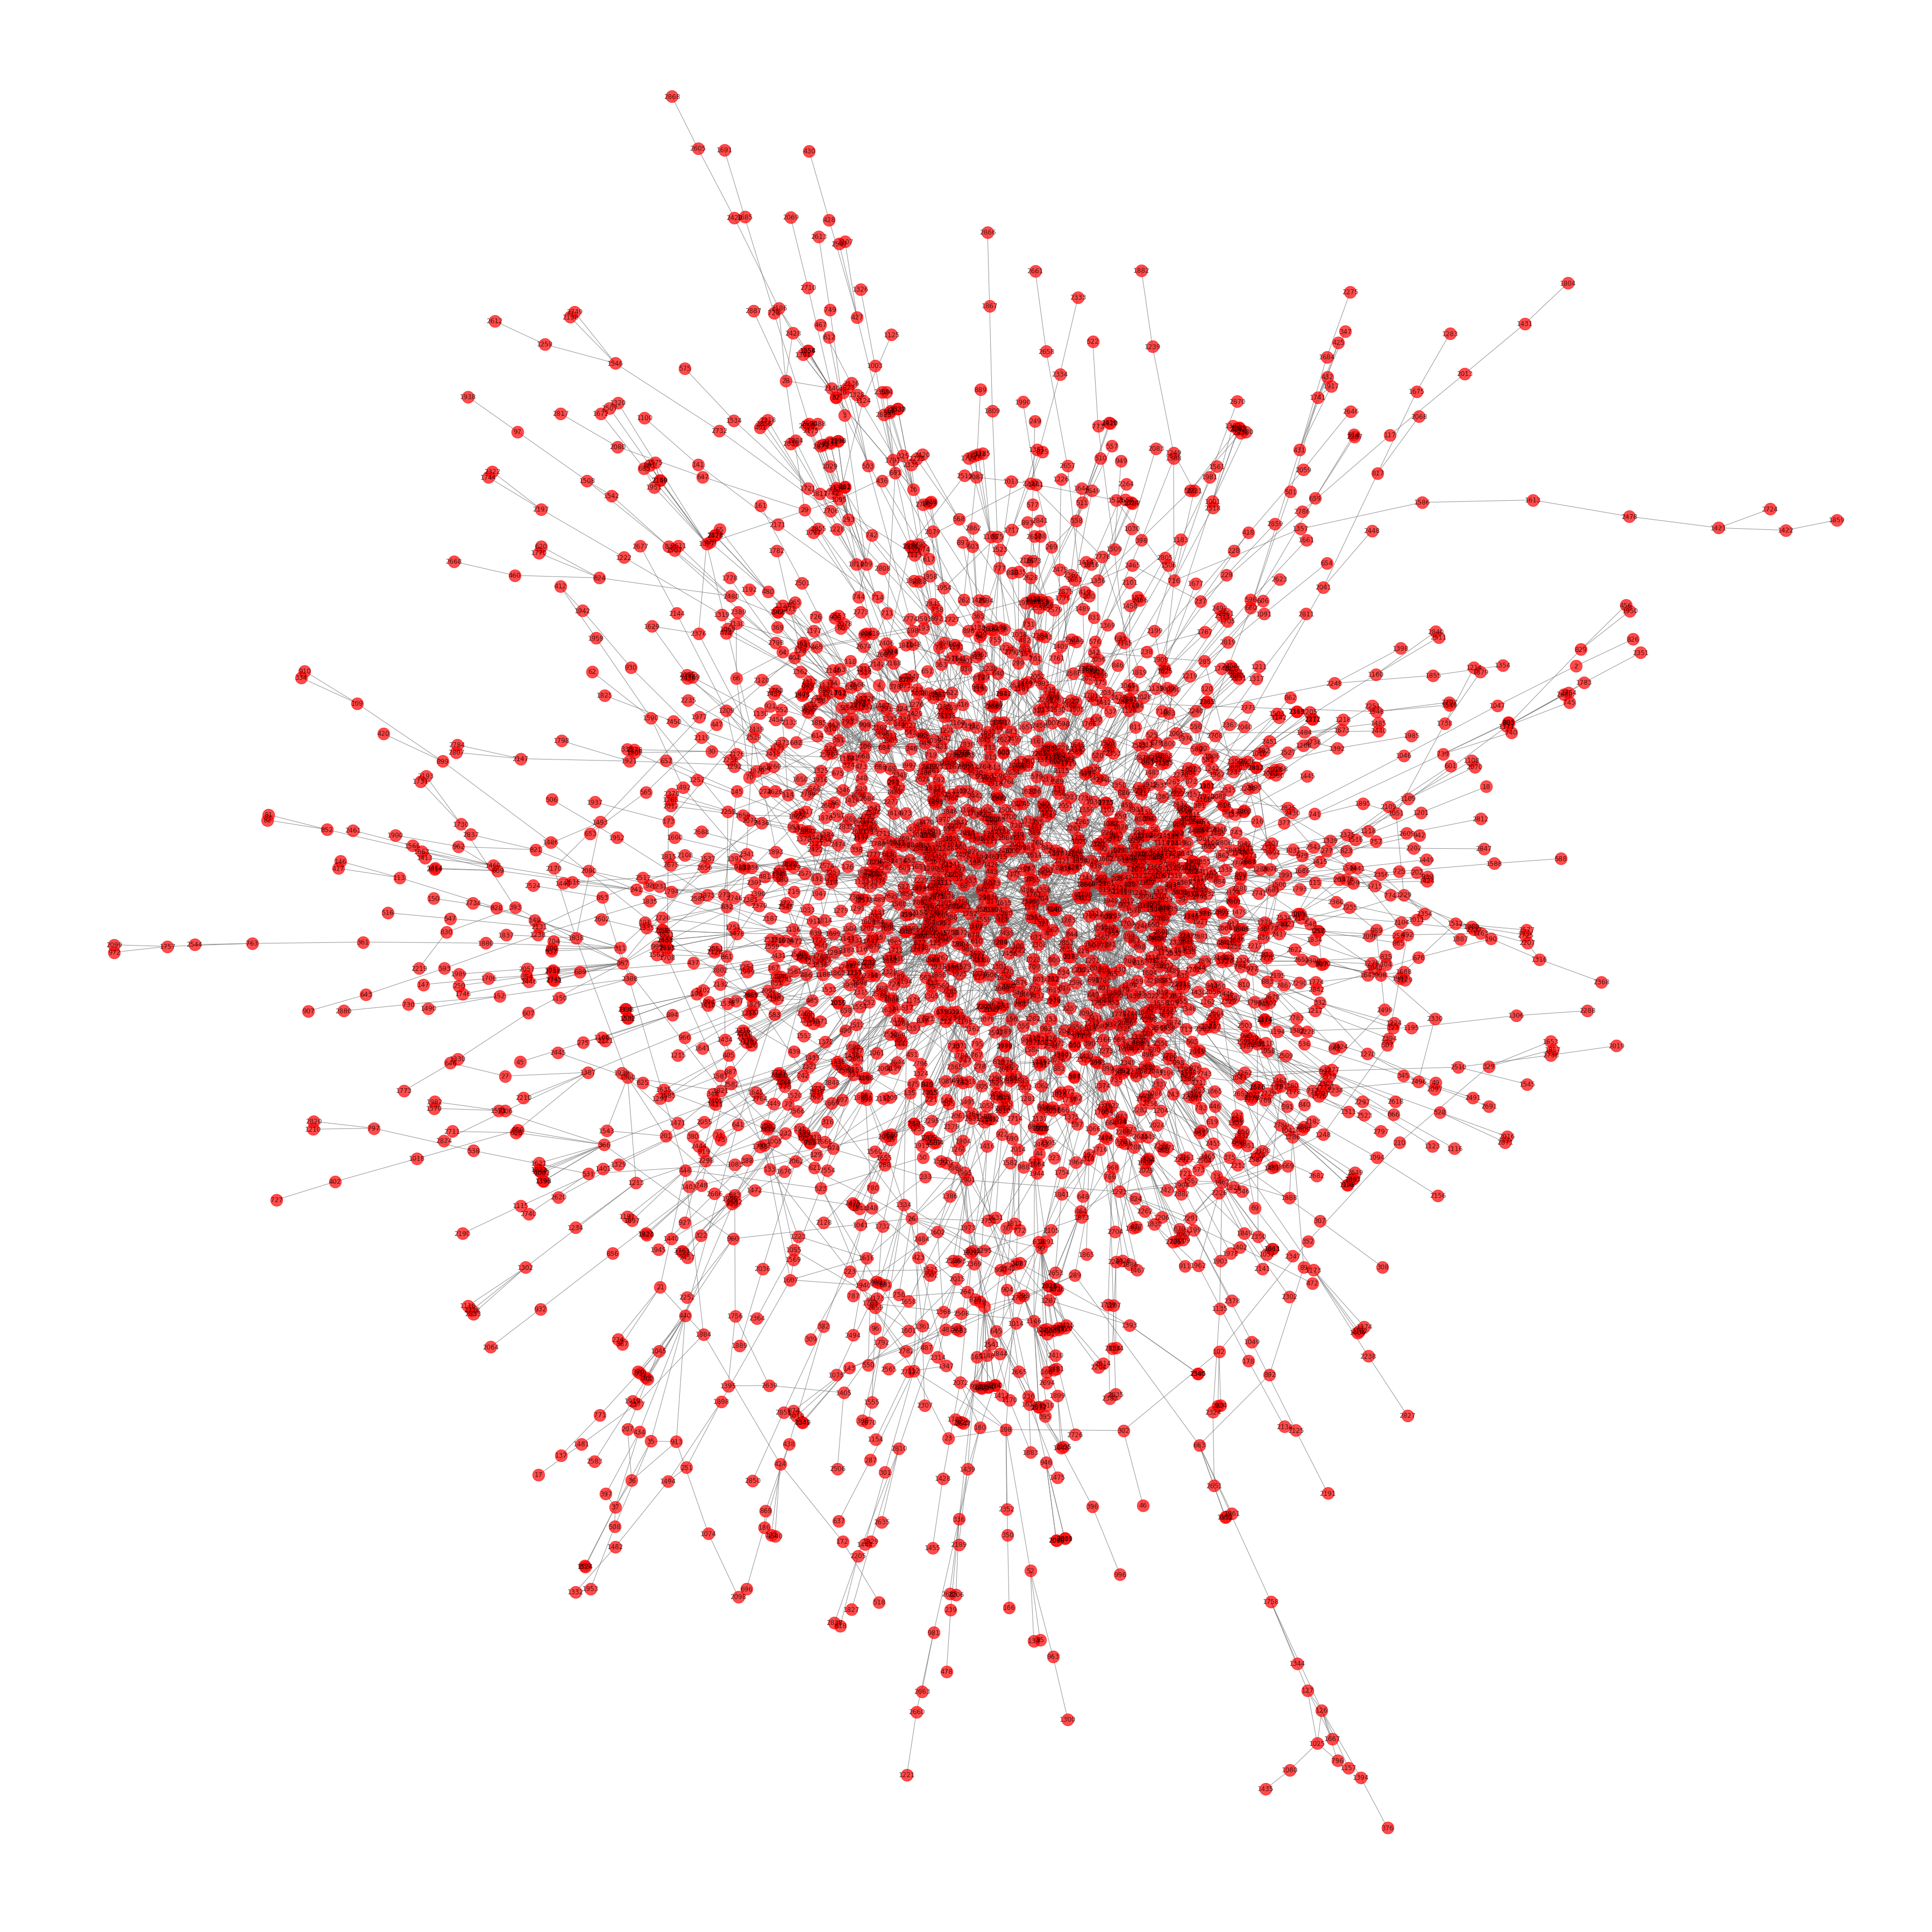

In [345]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(50, 50))

nx.draw_networkx(data, pos=spring_pos, alpha=0.7, with_labels=1, edge_color='.4', node_size=500)

plt.axis('off')
plt.tight_layout();

In [346]:
# Add nodes
#G.add_nodes_from([1, 2, 3]) # You can also add a list of nodes by passing a list argument

# Add edges 
#e = (2,3)
#G.add_edge(*e) # * unpacks the tuple
#G.add_edges_from([(2,3), (1,2), (1,3)]) # Just like nodes we can add edges from a list

#G.nodes()
#G.edges()
#nx.draw(G)

In [347]:
#print(nx.clustering(data)) #Clustering Coefficient

(-0.9602388001909001,
 1.0945794440736516,
 -1.006291252658641,
 1.0776302042463182)

<Figure size 3600x3600 with 0 Axes>

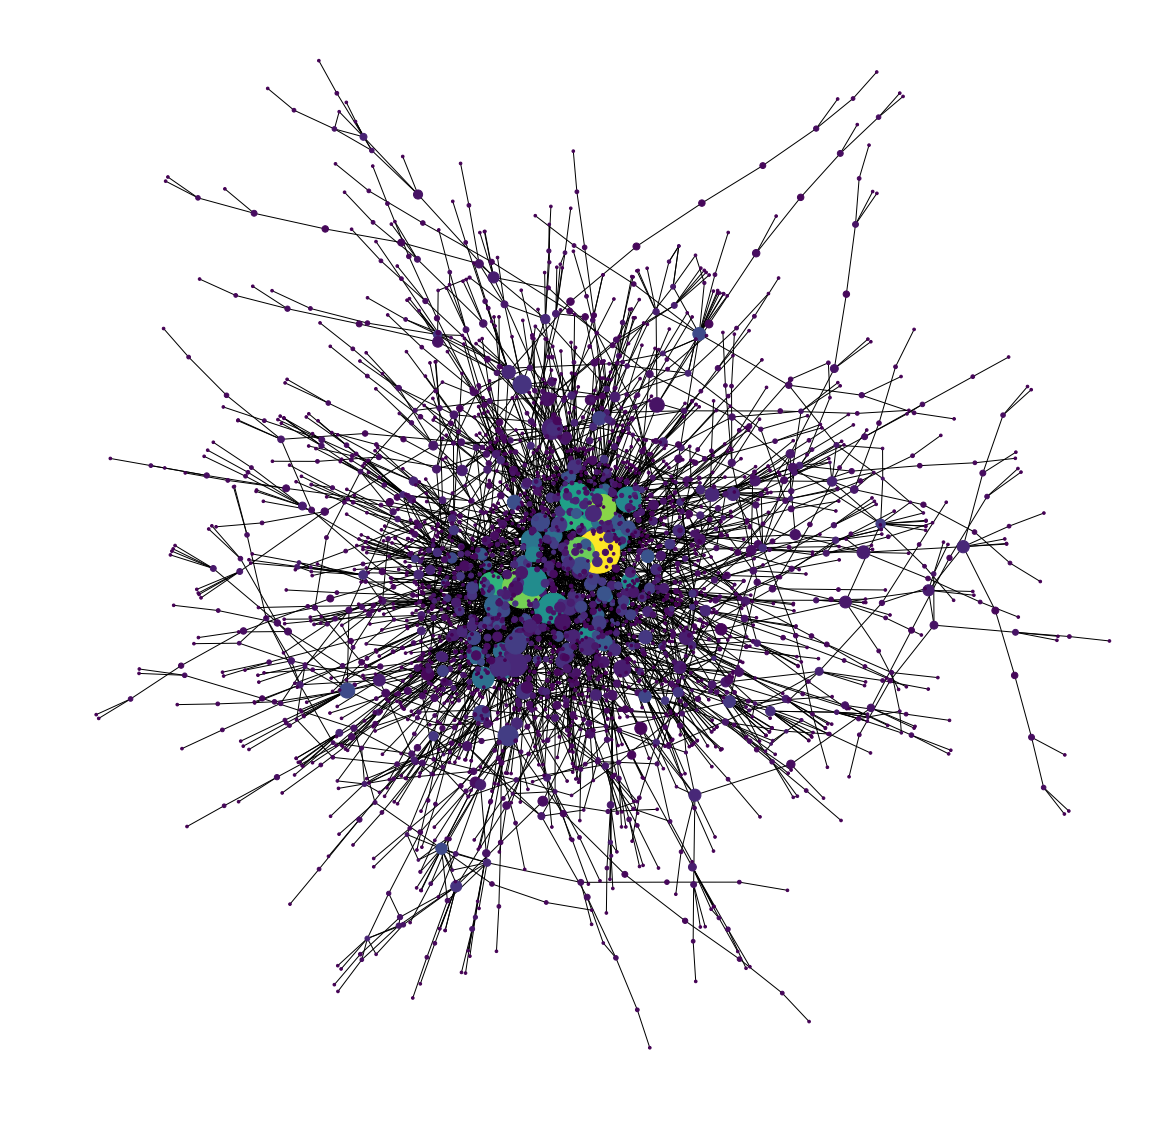

In [348]:
pos = nx.spring_layout(data)

plt.figure(figsize=(50, 50))

betCent = nx.betweenness_centrality(data, normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [349]:
degrees = [val for (node, val) in data.degree()]
#degrees

(-1.0631920370364805,
 1.0365655097270627,
 -0.9587887712663217,
 1.0941717215722604)

<Figure size 3600x3600 with 0 Axes>

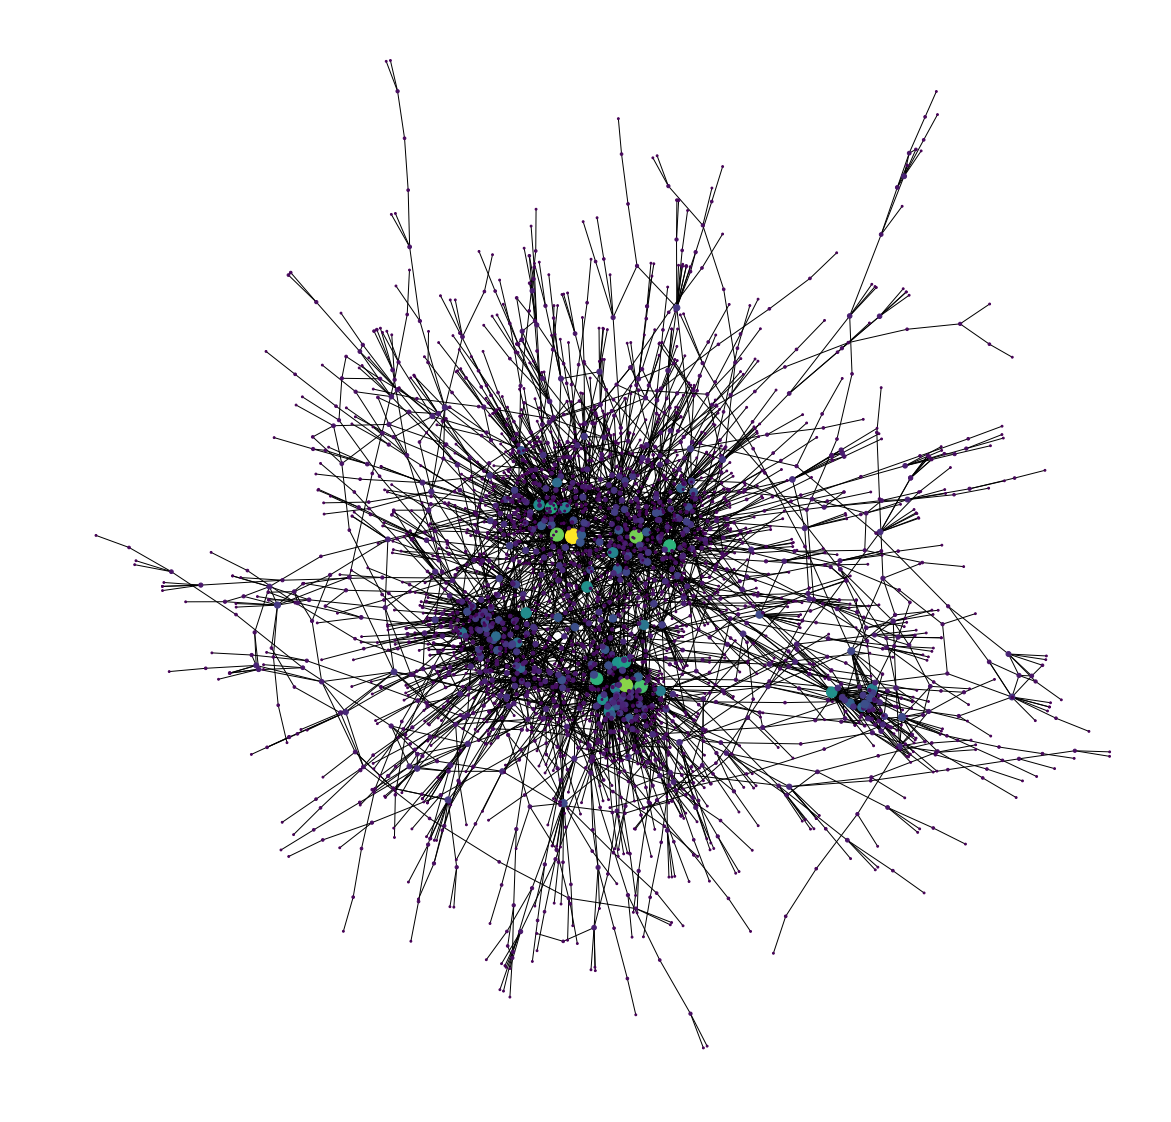

In [350]:
pos = nx.spring_layout(data)

plt.figure(figsize=(50, 50))

degCent = nx.degree_centrality(data)
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-0.9795433866374617,
 1.0942640309795566,
 -0.9376788409738553,
 0.7324364727278625)

<Figure size 3600x3600 with 0 Axes>

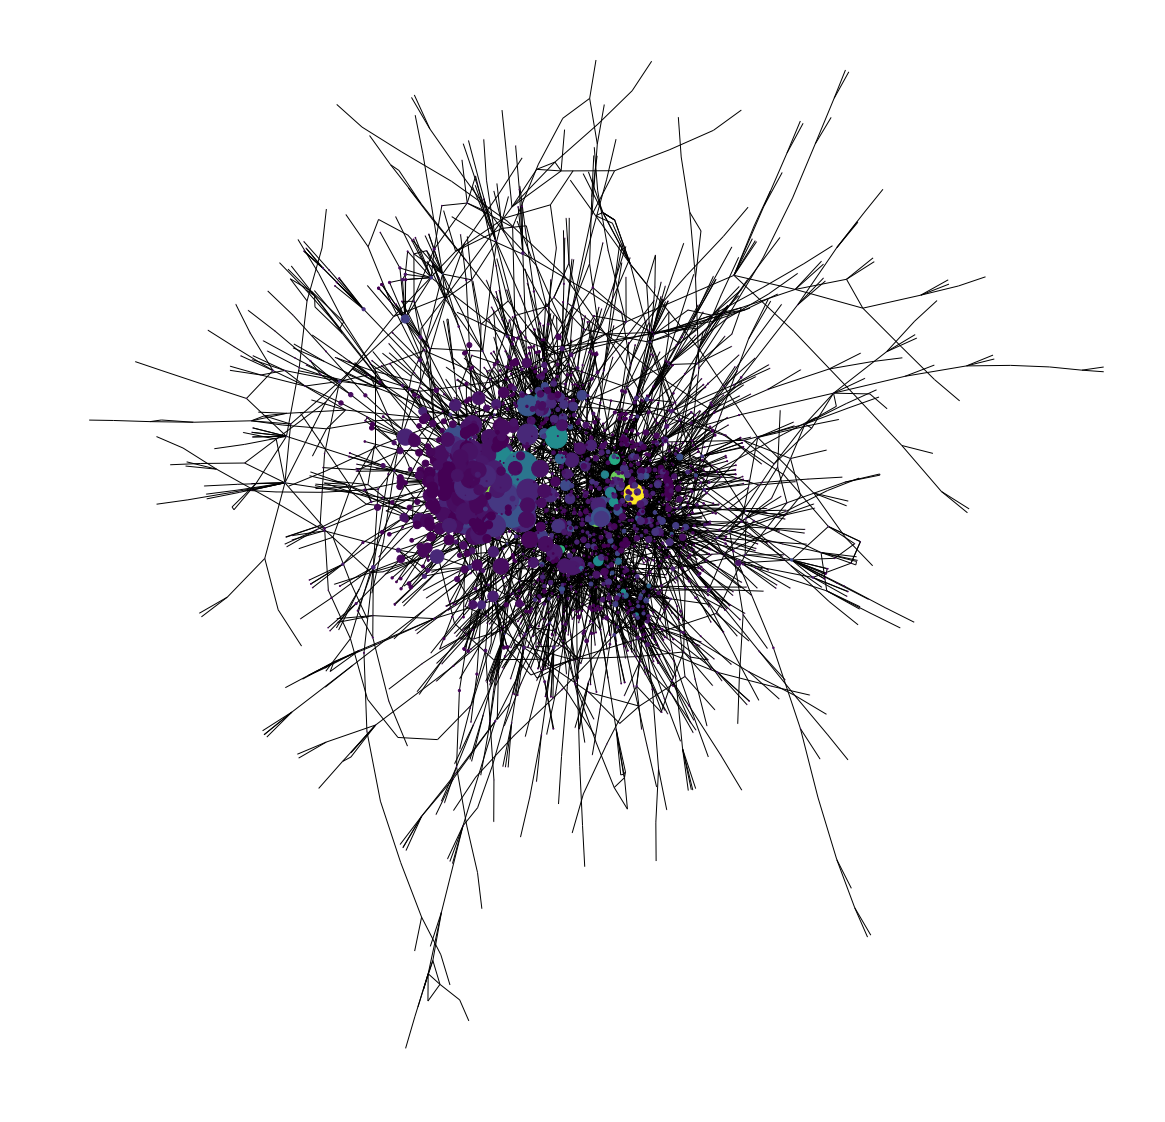

In [351]:
pos = nx.spring_layout(data)

plt.figure(figsize=(50, 50))

eigenVectCent = nx.eigenvector_centrality(data)
node_size =  [v * 10000 for v in eigenVectCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(data, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [352]:
sorted_degCent = sorted(degCent, key=degCent.get, reverse=True)[:10]

In [353]:
sorted_eigenVectCent = sorted(eigenVectCent, key=eigenVectCent.get, reverse=True)[:10]

In [354]:
sorted_betCent = sorted(betCent, key=betCent.get, reverse=True)[:10]

In [355]:
print("Top 20 nodes by degree:")
for d in sorted_degCent[:20]:
    print(d)

Top 20 nodes by degree:
298
736
304
389
205
93
561
359
119
91


In [356]:
print("Top 20 nodes by eigen Vector:")
for d in sorted_eigenVectCent[:20]:
    print(d)

Top 20 nodes by eigen Vector:
205
561
91
542
833
119
736
1597
422
1578


In [357]:
print("Top 20 nodes by between centrality")
for d in sorted_betCent[:20]:
    print(d)

Top 20 nodes by between centrality
298
304
119
156
389
841
736
782
574
93


In [358]:
# 119 and 736 are most important nodes in the network

In [359]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(data))

True


In [360]:
communities = community.best_partition(data)

In [361]:
nx.set_node_attributes(data, communities, 'modularity')
nx.set_node_attributes(data, communities, 'eigenvector')

#nx.set_node_attributes(data, communities, 'betweenness')
#nx.set_node_attributes(data, communities, 'degree')

In [369]:
mylist = []

for i in range(len(modularity)):
    # Get a list of just the nodes in that class
    class_nodes = [n for n in data.nodes() if data.node[n]['modularity'] == i]
    print("-------------------------------------------------------------------------------")
    print('Cluster_'+str(i)+' members :', class_nodes)
    
    if len(class_nodes) > 100:
        mylist.append((i, len(class_nodes)))
    
    # Then create a dictionary of the eigenvector centralities of those nodes
    # Eigenvector centrality as a ranking can give you a sense of the important people within this modularity class. 
    class_eigenvector = {n:data.node[n]['eigenvector'] for n in class_nodes}    
    #class_betweenness = {n:data.node[n]['betweenness'] for n in class_nodes}    
    #class_degree = {n:data.node[n]['degree'] for n in class_nodes}
        
    # Then sort that dictionary and print the first 5 results
    class_sorted_by_eigenvector = sorted(class_eigenvector.items(), key=itemgetter(1), reverse=True)    
    #class_sorted_by_betweenness = sorted(class_betweenness.items(), key=itemgetter(1), reverse=True)    
    #class_sorted_by_degree = sorted(class_degree.items(), key=itemgetter(1), reverse=True)
        
    for node in class_sorted_by_eigenvector[:1]:
        print("Cluster_", i, "  Most influential peel -> ", node[0]) 

-------------------------------------------------------------------------------
Cluster_0 members : [1, 422, 18, 1201, 20, 394, 22, 205, 341, 346, 385, 561, 833, 872, 1088, 1483, 1578, 1597, 1642, 1949, 2265, 2616, 1044, 2355, 435, 57, 58, 91, 327, 461, 743, 857, 901, 935, 1023, 1323, 1878, 2076, 2146, 2159, 542, 1242, 69, 227, 2627, 84, 119, 170, 820, 978, 1099, 1318, 1456, 1568, 1836, 1955, 2164, 2362, 2560, 2752, 215, 782, 107, 707, 265, 644, 736, 898, 944, 1143, 1273, 1352, 1603, 1848, 1972, 2116, 2215, 2366, 2382, 2385, 120, 2592, 122, 1454, 1862, 1891, 2230, 938, 218, 169, 759, 1371, 1681, 1793, 1936, 199, 1941, 226, 217, 754, 902, 903, 1288, 1345, 1432, 1579, 1605, 1662, 1790, 1935, 2006, 2122, 2286, 2403, 1593, 2032, 2279, 2293, 2316, 216, 234, 1988, 1991, 1253, 1933, 330, 521, 849, 2073, 2172, 225, 283, 1026, 1037, 2033, 2876, 1450, 1244, 788, 951, 1438, 1749, 1946, 2829, 277, 320, 1272, 2222, 2380, 328, 1633, 1365, 1479, 2161, 2245, 2306, 1205, 2272, 2311, 371, 2246, 379, 139

In [363]:
print("Clusters with more than 100 members\n--------------------------------------")    
for item in mylist:
    print(item)    

Clusters with more than 100 members
--------------------------------------
(0, 296)
(3, 126)
(6, 300)
(8, 322)
(14, 106)
(16, 179)
(19, 126)
(35, 104)
